**Load & Analyze Text**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:

word_index = imdb.get_word_index()
index_word = {v+3: k for k, v in word_index.items()}
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'
index_word[3] = '<UNUSED>'

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)




1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Decode a review

In [3]:
# Decode a review
def decode_review(text):
    return ' '.join([index_word.get(i, '?') for i in text])

print("Example review:\n", decode_review(x_train[0]))
print("Label:", y_train[0])  # 1 = positive, 0 = negative

Example review:
 <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

**Sequence Padding**

In [4]:

max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


# Build RNN

In [7]:
# Define maximum number of words to consider in the vocabulary
max_features = 10000  # <- Define this BEFORE using it

# Define maximum review length (for padding)
maxlen = 500
model = Sequential([
    Embedding(max_features, 32), # Use max_features in the Embedding layer
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"RNN Test Accuracy: {test_acc}")


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 152ms/step - accuracy: 0.5791 - loss: 0.6643 - val_accuracy: 0.8050 - val_loss: 0.4436
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 148ms/step - accuracy: 0.8401 - loss: 0.3723 - val_accuracy: 0.8112 - val_loss: 0.4450
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 175ms/step - accuracy: 0.8919 - loss: 0.2775 - val_accuracy: 0.8219 - val_loss: 0.4433
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 175ms/step - accuracy: 0.9460 - loss: 0.1565 - val_accuracy: 0.7750 - val_loss: 0.5753
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 123s 151ms/step - accuracy: 0.9713 - loss: 0.0868 - val_accuracy: 0.7856 - val_loss: 0.6162
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.7832 - loss: 0.6201
RNN Test Accuracy: 0.7856000065803528


# Train the Model

In [12]:

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_rnn_imdb.h5", save_best_only=True)
]

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9826 - loss: 0.0588

391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 190ms/step - accuracy: 0.9826 - loss: 0.0588 - val_accuracy: 0.7814 - val_loss: 0.7262
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 190ms/step - accuracy: 0.9962 - loss: 0.0188 - val_accuracy: 0.7952 - val_loss: 0.7759
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 189ms/step - accuracy: 0.9996 - loss: 0.0067 - val_accuracy: 0.7783 - val_loss: 0.8900


# Evaluate the Model

In [13]:

loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7795 - loss: 0.7365

Test Accuracy: 78.14%


# Classification Report

In [16]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions, target_names=["Negative", "Positive"]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.78     12500
    Positive       0.77      0.80      0.79     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000



# Plot Accuracy and Loss

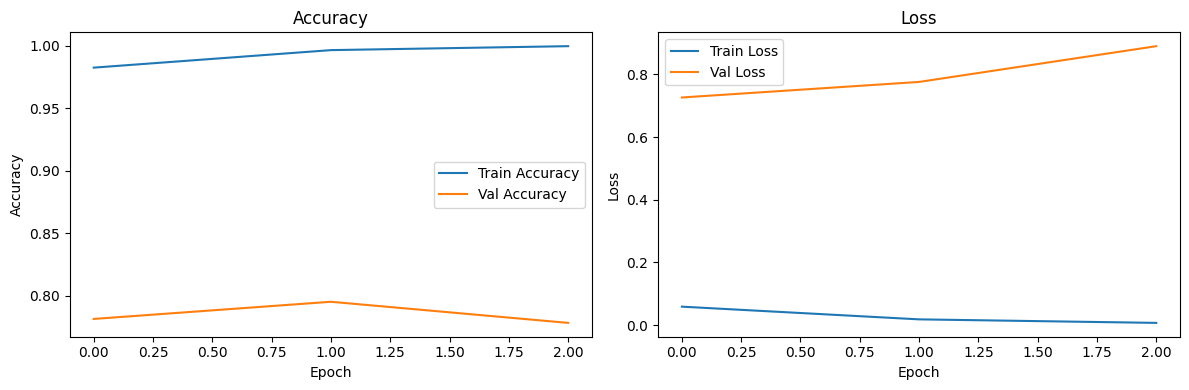

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


# Save Final Model


In [ ]:
model.save("final_rnn_imdb_model.h5")